# Problem Statement 1:

In [ ]:
# A retail store that has multiple outlets across the country are facing issues in managing the
# inventory - to match the demand with respect to supply. You are a data scientist, who has to
# come up with useful insights using the data and make prediction models to forecast the sales for
# X number of months/years.

In [ ]:
# Dataset Information:
# The walmart.csv contains 6435 rows and 8 columns.

In [ ]:
# 1. Using the above data, come up with useful insights that can be used by each of
# the stores to improve in various areas.
# 2. Forecast the sales for each store for the next 12 weeks

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df= pd.read_csv("C:\\Desktop\\Walmart.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
# First lets check if there is any null values present

In [ ]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [ ]:
# Now lets check if we have any empty spaces present

In [ ]:
col = list(df.columns)

In [ ]:
for i in col:
    if (df[i] == " ").any():
        print("Empty Spaces Present")
    else:
        print("All Clear")

All Clear
All Clear
All Clear
All Clear
All Clear
All Clear
All Clear
All Clear


In [ ]:
# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
# so here for the Date columns Dtype is Object so we are going to convert this to object type

In [ ]:
df["Date"]= pd.to_datetime(df["Date"])

C:\Users\Sasi\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Sasi\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Sasi\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Sasi\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-03-2010' in DD/MM/YYYY format. Provide format or specify in

In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [ ]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
minimum  = '{0:.20f}'.format(2.099862e+05)
maximum = '{0:.20f}'.format(3.818686e+06)

In [ ]:
minimum

'209986.20000000001164153218'

In [ ]:
maximum

'3818686.00000000000000000000'

In [ ]:
# Now we are going to check weather our data contains any duplicate values 

In [ ]:
df.duplicated().sum()

0

In [ ]:
# now lets check the correlation between our features 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

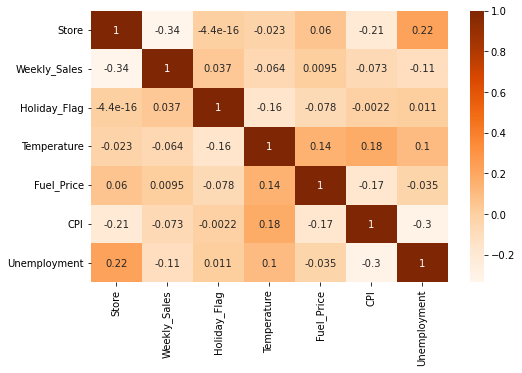

In [ ]:
plt.figure(figsize = (8,5))
sns.heatmap(df.corr(),annot = True,cmap = "Oranges")
plt.show()

In [ ]:
col = list(df.columns)

In [ ]:
col.remove("Date")

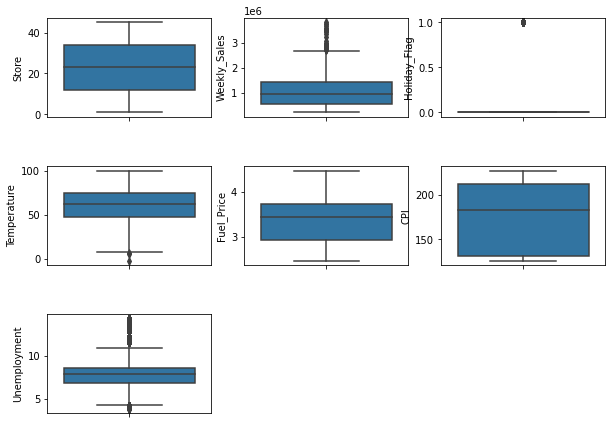

In [ ]:
# Now lets check for outliers

plt.figure(figsize = (10,10))
for p,q in enumerate(col,start = 1):
    plt.subplot(4,3,p)
    plt.subplots_adjust(hspace = .5)
    sns.boxplot(y = q,data=df)
    plt.xticks(rotation = 90)
plt.show()

In [ ]:
# So here we can see that we dont have that much outliers so we are not removing any outliers from our data

In [ ]:
# # Now lets do some Visualisation
# so here as we are having lot of stores lets find the top 3 best performing stores
# and top 3 worst perfroming stores

In [ ]:
grouped = df.groupby("Store")

In [ ]:
avg_sales = grouped["Weekly_Sales"].mean()

In [ ]:
sorted_avg_sales = avg_sales.sort_values(ascending=False)

In [ ]:
sorted_avg_sales

Store
20    2.107677e+06
4     2.094713e+06
14    2.020978e+06
13    2.003620e+06
2     1.925751e+06
10    1.899425e+06
27    1.775216e+06
6     1.564728e+06
1     1.555264e+06
39    1.450668e+06
19    1.444999e+06
31    1.395901e+06
23    1.389864e+06
24    1.356755e+06
11    1.356383e+06
28    1.323522e+06
41    1.268125e+06
32    1.166568e+06
18    1.084718e+06
22    1.028501e+06
12    1.009002e+06
26    1.002912e+06
34    9.667816e+05
40    9.641280e+05
35    9.197250e+05
8     9.087495e+05
17    8.935814e+05
45    7.859814e+05
21    7.560691e+05
25    7.067215e+05
43    6.333247e+05
15    6.233125e+05
7     5.706173e+05
42    5.564039e+05
9     5.439806e+05
29    5.394514e+05
16    5.192477e+05
37    5.189003e+05
30    4.385796e+05
3     4.027044e+05
38    3.857317e+05
36    3.735120e+05
5     3.180118e+05
44    3.027489e+05
33    2.598617e+05
Name: Weekly_Sales, dtype: float64

In [ ]:
top_3_best = sorted_avg_sales.head(3)

In [ ]:
top_3_worst = sorted_avg_sales.tail(3)

In [ ]:
top_3_best

Store
20    2.107677e+06
4     2.094713e+06
14    2.020978e+06
Name: Weekly_Sales, dtype: float64

In [ ]:
top_3_worst

Store
5     318011.810490
44    302748.866014
33    259861.692028
Name: Weekly_Sales, dtype: float64

In [ ]:
# so here first lets combine top best store who is having the best Weekly_Sales and top worst store
#who is having the worst weekly_sales

In [ ]:
store_20 = df.query("Store == 20")
store_4 = df.query("Store == 4")
store_14 = df.query("Store == 14")
store_5 = df.query("Store == 5")
store_44 = df.query("Store == 44")
store_33 = df.query("Store == 33")

In [ ]:
joined_data = pd.concat([store_20,store_4,store_14,store_5,store_44, store_33,], axis=0)

In [ ]:
joined_data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
2717,20,2010-05-02,2401395.47,0,25.92,2.784,204.247194,8.187
2718,20,2010-12-02,2109107.90,1,22.12,2.773,204.385747,8.187
2719,20,2010-02-19,2161549.76,0,25.43,2.745,204.432100,8.187
2720,20,2010-02-26,1898193.95,0,32.32,2.754,204.463087,8.187
2721,20,2010-05-03,2119213.72,0,31.75,2.777,204.494073,8.187
...,...,...,...,...,...,...,...,...
4714,33,2012-09-28,242813.51,0,86.42,3.966,131.043000,7.147
4715,33,2012-05-10,265444.90,0,85.18,4.132,131.075667,6.895
4716,33,2012-12-10,291781.15,0,79.64,4.468,131.108333,6.895
4717,33,2012-10-19,254412.34,0,75.55,4.449,131.149968,6.895


In [ ]:
#  Now lets see the correlation in our new data

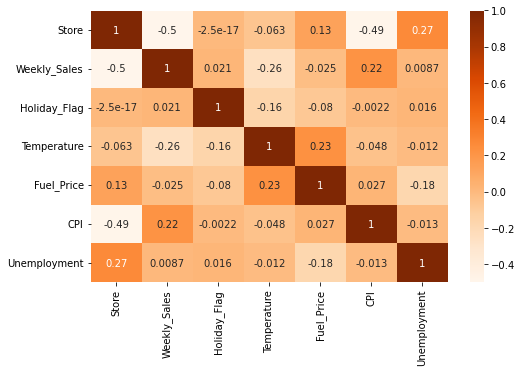

In [ ]:
plt.figure(figsize = (8,5))
sns.heatmap(joined_data.corr(),annot = True,cmap = "Oranges")
plt.show()

In [ ]:
# so here in joined_data we are having the best and the worst store and now we will be 
# taking some visual study in this data 

In [ ]:
col = list(df.columns)

In [ ]:
col

['Store',
 'Date',
 'Weekly_Sales',
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment']

<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

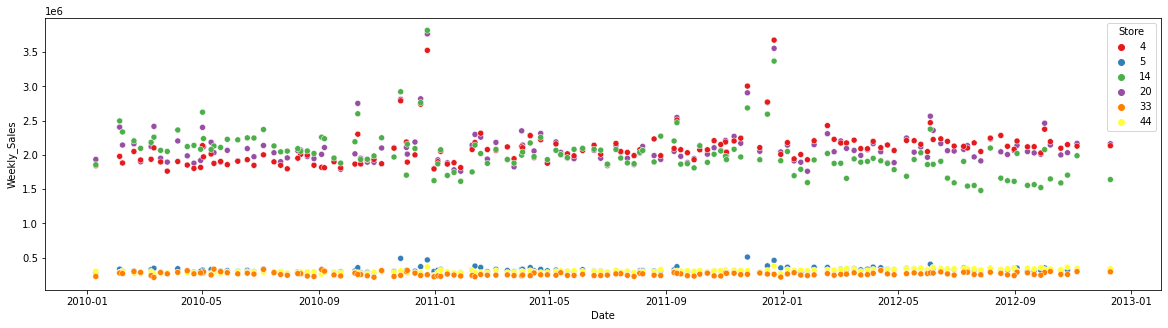

In [ ]:
plt.figure(figsize = (20,5))
sns.scatterplot(x = 'Date', y = 'Weekly_Sales',hue='Store',data = joined_data,palette="Set1")

# so here from the below plot we can see that all the best performing stores are consisitent through out the 
# time period in their weekly Sales so we can say that these stores are located in a busy areas where the demand meets 
# their supply Store(20,4,14)

# and in the case of the worst performing stores we can say that their sales are below 0.5 and whcih is 
# consisitenly moving in a straight line below or 0.5 level so we can say that their demand for product 
# is not very much

<AxesSubplot:xlabel='Weekly_Sales', ylabel='CPI'>

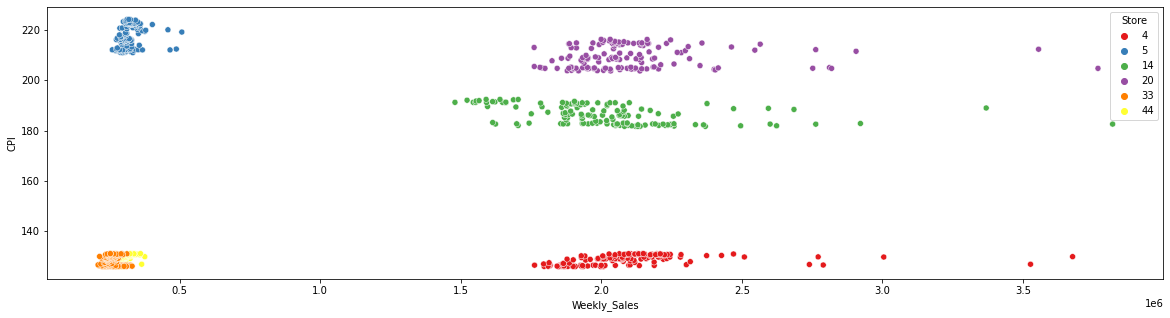

In [ ]:
plt.figure(figsize = (20,5))
sns.scatterplot(x = 'Weekly_Sales', y = 'CPI',hue='Store',data = joined_data,palette="Set1")

# so here we can see that the consume price index dosint affect the top stores as 
# we can see that their weekly sales are consistent and for the least performing store
# only we can see for the store 5 when consumer price index is high and it has a little 
# bit more weekly sales that that than the rest of the stores that is 44 and 33

<AxesSubplot:xlabel='Weekly_Sales', ylabel='Holiday_Flag'>

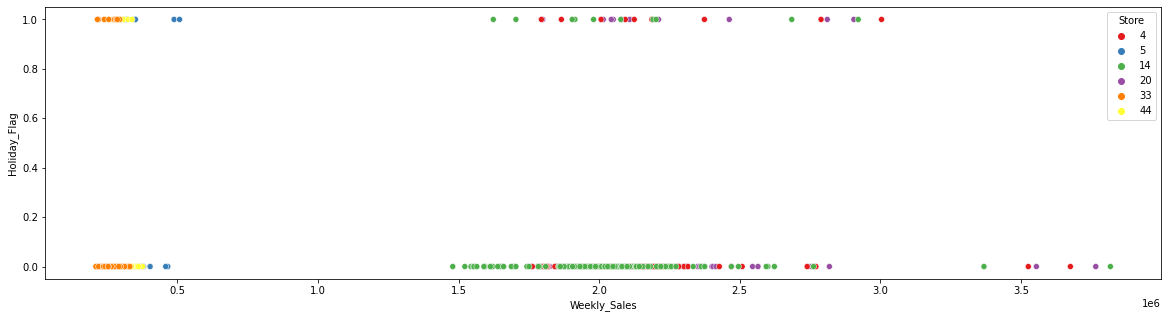

In [ ]:
plt.figure(figsize = (20,5))
sns.scatterplot(x = 'Weekly_Sales', y = 'Holiday_Flag',hue='Store',data = joined_data,palette="Set1")

# well here intrestinlgy we can see that at the time of holidays the weekly sales are happening in 
# least performing stores as almost same as in the working days that is from the below plot we can see in store no 44.

# And for the best performing stores we can say that sales are happening but not like its happending in 
# the working days

<AxesSubplot:xlabel='Weekly_Sales', ylabel='Temperature'>

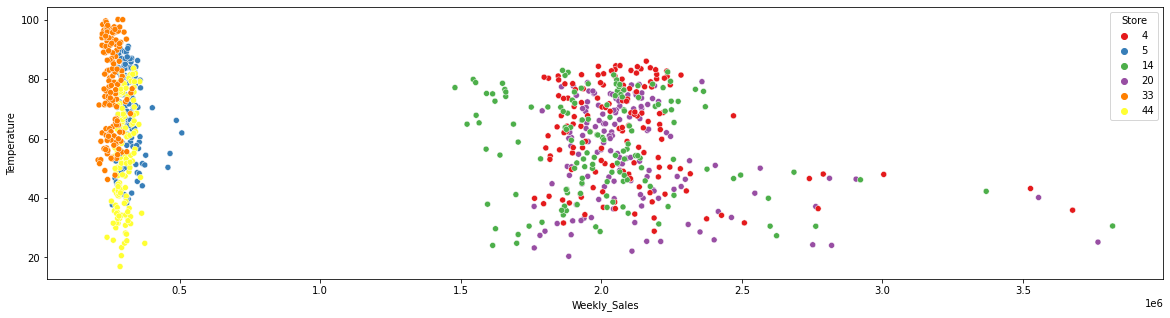

In [ ]:
plt.figure(figsize = (20,5))
sns.scatterplot(x = 'Weekly_Sales', y = 'Temperature',hue='Store',data = joined_data,palette="Set1")

# so from here we can say that for all the best performing stores the temperature is between
# the range of (80-20)

# and for the least performig stores its beyond that as for store 33 its reaching almost 100 and
# for store 44 its reaching below 20 so here we can say that these stores could get some icecreams, summer ware
# or coldrinks.

<AxesSubplot:xlabel='Weekly_Sales', ylabel='Fuel_Price'>

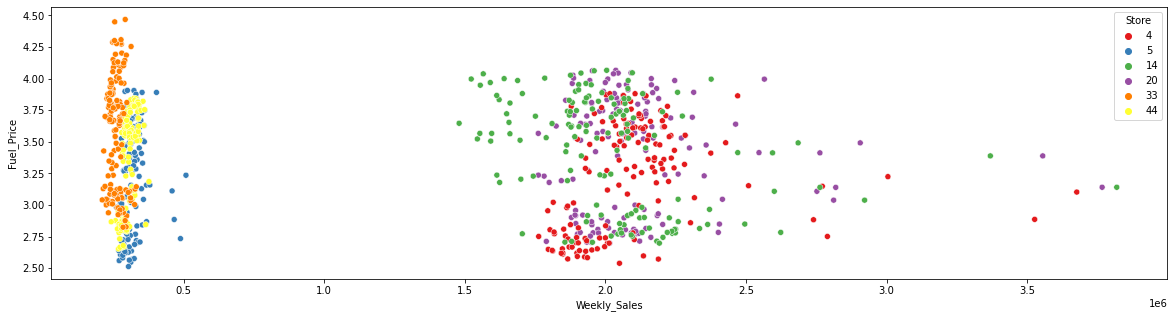

In [ ]:
plt.figure(figsize = (20,5))
sns.scatterplot(x = 'Weekly_Sales', y = 'Fuel_Price',hue='Store',data = joined_data,palette="Set1")

# so here for the best performing stores the fule prices are between a range of 2.5 and 4
# and when its above or below this level the sales are not happening 

# in the case of least performing store we can say that in these area the fuel prices are more fluctuating 
# and sales are happening even if the fuel prices are more that 4.0

<AxesSubplot:xlabel='Weekly_Sales', ylabel='Unemployment'>

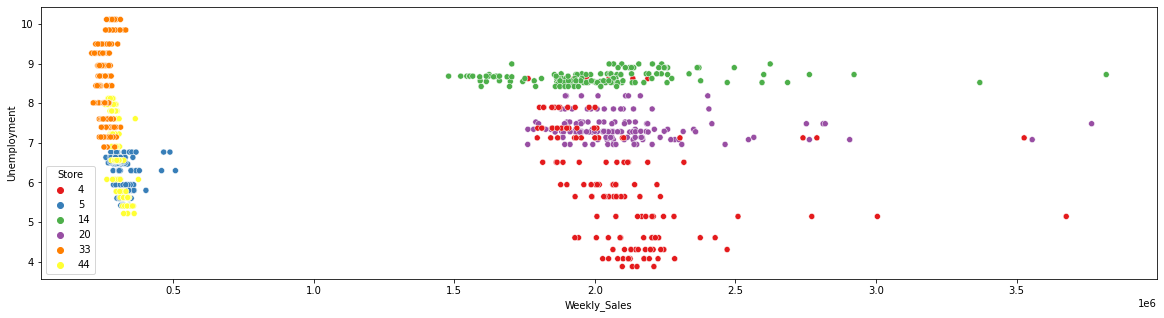

In [ ]:
plt.figure(figsize = (20,5))
sns.scatterplot(x = 'Weekly_Sales', y = 'Unemployment',hue='Store',data = joined_data,palette="Set1")

# so here we can see that the unemployment rate is more in the least perfomring store area as we can see that
# its between a range of 5.5 and above. here the max unemployment rate is in store 33

# while in the best performing area we can say that the unemployment rate is below 9  as the least unemployment area
# is in store 4 

In [ ]:
# Model Building Part

In [ ]:
# So here we are taking Random Forest Model

In [ ]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
col = list(df.columns)

In [ ]:
col

['Store',
 'Date',
 'Weekly_Sales',
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment']

In [ ]:
# Now we are going to do binnning in our data set

In [ ]:
bins = [0,500000,1000000,1500000,2500000,4000000]

In [ ]:
print(f"So here our maximum sale is {maximum} and our minimum sale is {minimum}")

So here our maximum sale is 3818686.00000000000000000000 and our minimum sale is 209986.20000000001164153218


In [ ]:
df1= df[col]

In [ ]:
df1["Weekly_Sales"] = pd.cut(df["Weekly_Sales"],bins)
df1["Weekly_Sales"] = df1["Weekly_Sales"].astype(str)

In [ ]:
df1

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,"(1500000, 2500000]",0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,"(1500000, 2500000]",1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,"(1500000, 2500000]",0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,"(1000000, 1500000]",0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,"(1500000, 2500000]",0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,"(500000, 1000000]",0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,"(500000, 1000000]",0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,"(500000, 1000000]",0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,"(500000, 1000000]",0,56.47,3.969,192.330854,8.667


In [ ]:
# Now lets split our Dataset to Train and test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
col.remove("Date")

In [ ]:
col.remove("Weekly_Sales")

In [ ]:
x = df1[col]

In [ ]:
y = df1["Weekly_Sales"]

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   object        
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
x

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,0,42.31,2.572,211.096358,8.106
1,1,1,38.51,2.548,211.242170,8.106
2,1,0,39.93,2.514,211.289143,8.106
3,1,0,46.63,2.561,211.319643,8.106
4,1,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...
6430,45,0,64.88,3.997,192.013558,8.684
6431,45,0,64.89,3.985,192.170412,8.667
6432,45,0,54.47,4.000,192.327265,8.667
6433,45,0,56.47,3.969,192.330854,8.667


In [ ]:
y

0       (1500000, 2500000]
1       (1500000, 2500000]
2       (1500000, 2500000]
3       (1000000, 1500000]
4       (1500000, 2500000]
               ...        
6430     (500000, 1000000]
6431     (500000, 1000000]
6432     (500000, 1000000]
6433     (500000, 1000000]
6434     (500000, 1000000]
Name: Weekly_Sales, Length: 6435, dtype: object

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30,random_state= 0)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4504, 6)
(1931, 6)
(4504,)
(1931,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.metrics import*

In [ ]:
trees = []
for i in range(100,1100,100):
    trees.append(i)
print(trees)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]


In [ ]:
accuracys = []

for i in trees:
    model = RandomForestClassifier(n_estimators = i)
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    a = accuracy_score(y_test,pred)
    accuracys.append(a)
    
print(accuracys)

[0.8575867426204039, 0.859658208182289, 0.859658208182289, 0.8560331434489902, 0.859658208182289, 0.8560331434489902, 0.859658208182289, 0.859658208182289, 0.8586224754013465, 0.8591403417918178]


In [ ]:
d = {"Number_Of_Trees":trees,"Accuracy":accuracys}

In [ ]:
table1 = pd.DataFrame(d)
table1

,Number_Of_Trees,Accuracy
0,100,0.857587
1,200,0.859658
2,300,0.859658
3,400,0.856033
4,500,0.859658
5,600,0.856033
6,700,0.859658
7,800,0.859658
8,900,0.858622
9,1000,0.859140


In [ ]:
# so here we can see that in the trees 200 we can see 86 percent accuracy 

In [ ]:
model = RandomForestClassifier(n_estimators = 200)
model.fit(x_train,y_train)
pred = model.predict(x_test)
accuracy = accuracy_score(y_test,pred)
print(accuracy)

0.8581046090108752


In [ ]:
# so t thus here we are getting an accuracy score of 85 percent 

In [ ]:
# lets check the confussion matrix now

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,pred))

                    precision    recall  f1-score   support

       (0, 500000]       0.93      0.88      0.91       362
(1000000, 1500000]       0.79      0.84      0.81       487
(1500000, 2500000]       0.87      0.82      0.84       412
(2500000, 4000000]       0.38      0.19      0.25        16
 (500000, 1000000]       0.87      0.90      0.89       654

          accuracy                           0.86      1931
         macro avg       0.77      0.73      0.74      1931
      weighted avg       0.86      0.86      0.86      1931



In [ ]:
# So here we can see the precision rate and recall for all our dependent variable which we have binned

# ARIMA MODEL

In [ ]:
col = list(df.columns)

In [ ]:
df2 = df[col]

In [ ]:
df2

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
df2["Weekly_Sales"] = df2["Weekly_Sales"].round().astype(int)

In [ ]:
# so here we have rounded off the weekly_sales feature

In [ ]:
# so here for performing ARIMA we have to convert the Index column to Date Column

In [ ]:
df2.index = df["Date"]

In [ ]:
df2

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,,
2010-05-02,1,2010-05-02,1643691,0,42.31,2.572,211.096358,8.106
2010-12-02,1,2010-12-02,1641957,1,38.51,2.548,211.242170,8.106
2010-02-19,1,2010-02-19,1611968,0,39.93,2.514,211.289143,8.106
2010-02-26,1,2010-02-26,1409728,0,46.63,2.561,211.319643,8.106
2010-05-03,1,2010-05-03,1554807,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
2012-09-28,45,2012-09-28,713174,0,64.88,3.997,192.013558,8.684
2012-05-10,45,2012-05-10,733455,0,64.89,3.985,192.170412,8.667
2012-12-10,45,2012-12-10,734464,0,54.47,4.000,192.327265,8.667


In [ ]:
df2 = df2.drop(columns = ["Date"])

In [ ]:
df2

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-05-02,1,1643691,0,42.31,2.572,211.096358,8.106
2010-12-02,1,1641957,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409728,0,46.63,2.561,211.319643,8.106
2010-05-03,1,1554807,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
2012-09-28,45,713174,0,64.88,3.997,192.013558,8.684
2012-05-10,45,733455,0,64.89,3.985,192.170412,8.667
2012-12-10,45,734464,0,54.47,4.000,192.327265,8.667


# BEST PERFORMING STORE /STORE NO 20

In [ ]:
df3 = df2[df2.Store ==20]

In [ ]:
df3

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-05-02,20,2401395,0,25.92,2.784,204.247194,8.187
2010-12-02,20,2109108,1,22.12,2.773,204.385747,8.187
2010-02-19,20,2161550,0,25.43,2.745,204.432100,8.187
2010-02-26,20,1898194,0,32.32,2.754,204.463087,8.187
2010-05-03,20,2119214,0,31.75,2.777,204.494073,8.187
...,...,...,...,...,...,...,...
2012-09-28,20,2008351,0,58.65,3.997,215.736716,7.280
2012-05-10,20,2246412,0,60.77,3.985,215.925886,7.293
2012-12-10,20,2162951,0,47.20,4.000,216.115057,7.293


In [ ]:
# Now we are checking weather our data is Satationary or Non Stationary

<AxesSubplot:xlabel='Date'>

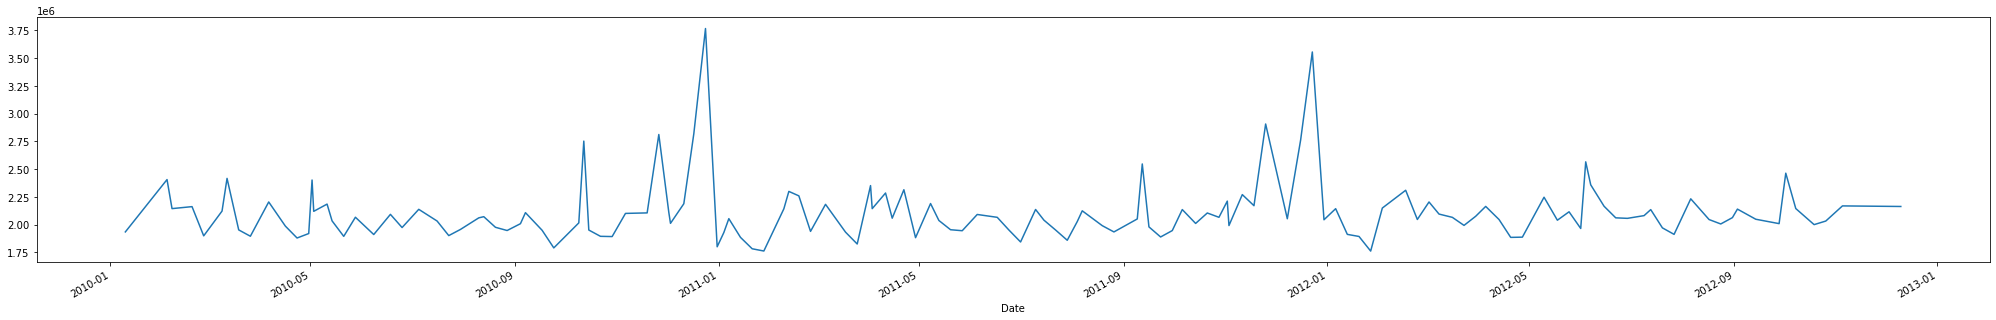

In [ ]:
plt.figure(figsize = (35,5))
df3["Weekly_Sales"].plot()

In [ ]:
# So now we by adfuller we are checking weather our model is stationary or not

In [ ]:
from statsmodels.tsa.stattools import adfuller
# if p- value > .05  - non Stationary
# if p - value< .05  - Stationary

In [ ]:
result = adfuller(df3["Weekly_Sales"])

In [ ]:
if result[1]> .05:
    print(f"Non Stationary as the value is p- value  {result[1]} > .05")
else:
    print(f"Stationary as the p-value is {result[1]}")

Stationary as the p-value is 3.491314250819246e-06


In [ ]:
# so here we have proved that our data is stationary 

In [ ]:
# now we are going let autoarima decide whcih model to take 

In [ ]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [ ]:
model_selection = auto_arima(df3["Weekly_Sales"],trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3974.854, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3991.762, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3971.424, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3977.707, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4574.703, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3972.263, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3972.813, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3974.255, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.942 seconds


In [ ]:
# so here they have told that the best fit model is ARIMA

In [ ]:
model_selection.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  143
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1982.712
Date:                Thu, 02 Feb 2023   AIC                           3971.424
Time:                        16:01:57   BIC                           3980.313
Sample:                             0   HQIC                          3975.036
                                - 143                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.304e+06   1.01e+05     12.964      0.000    1.11e+06     1.5e+06
ar.L1          0.3815      0.038     10.058      0.000       0.307       0.456
sigma2      6.452e+10      0.934   6.91e+10      0.000    6.45e+10    6.45e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):               674.61
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                             1.98
Prob(H) (two-sided):                  0.17   Kurtosis:                        12.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.67e+25. Standard errors may be unstable.
"""

In [ ]:
df3.index

DatetimeIndex(['2010-05-02', '2010-12-02', '2010-02-19', '2010-02-26',
               '2010-05-03', '2010-12-03', '2010-03-19', '2010-03-26',
               '2010-02-04', '2010-09-04',
               ...
               '2012-08-24', '2012-08-31', '2012-07-09', '2012-09-14',
               '2012-09-21', '2012-09-28', '2012-05-10', '2012-12-10',
               '2012-10-19', '2012-10-26'],
              dtype='datetime64[ns]', name='Date', length=143, freq=None)

In [ ]:
df3.shape

(143, 7)

In [ ]:
train = df3.iloc[:-20]
test = df3.iloc[-20:]
print(train.shape,test.shape)

(123, 7) (20, 7)


In [ ]:
# implimenting the model


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model = ARIMA(train["Weekly_Sales"],order = (1,0,0))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  123
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1713.305
Date:                Thu, 02 Feb 2023   AIC                           3432.610
Time:                        16:01:58   BIC                           3441.047
Sample:                             0   HQIC                          3436.037
                                - 123                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.112e+06   5.26e+04     40.133      0.000    2.01e+06    2.22e+06
ar.L1          0.3835      0.043      8.826      0.000       0.298       0.469
sigma2      7.344e+10      0.373   1.97e+11      0.000    7.34e+10    7.34e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):               437.07
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               4.42   Skew:                             1.84
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.68e+25. Standard errors may be unstable.
"""

In [ ]:

# now we are going to make prediction on the test set

In [ ]:
start = len(train)
end = len(train)+len(test)-1

In [ ]:
Predict = model.predict(start = start,end = end,dynamic=True)

In [ ]:
len(df3.index[start:end+1])

20

In [ ]:
len(Predict)

20

In [ ]:

Predict.index = df3.index[start:end+1]
print(Predict)

Date
2012-06-15    2.158042e+06
2012-06-22    2.129696e+06
2012-06-29    2.118827e+06
2012-06-07    2.114659e+06
2012-07-13    2.113061e+06
2012-07-20    2.112448e+06
2012-07-27    2.112213e+06
2012-03-08    2.112123e+06
2012-10-08    2.112088e+06
2012-08-17    2.112075e+06
2012-08-24    2.112070e+06
2012-08-31    2.112068e+06
2012-07-09    2.112067e+06
2012-09-14    2.112067e+06
2012-09-21    2.112067e+06
2012-09-28    2.112067e+06
2012-05-10    2.112067e+06
2012-12-10    2.112067e+06
2012-10-19    2.112067e+06
2012-10-26    2.112067e+06
Name: predicted_mean, dtype: float64


<AxesSubplot:xlabel='Date'>

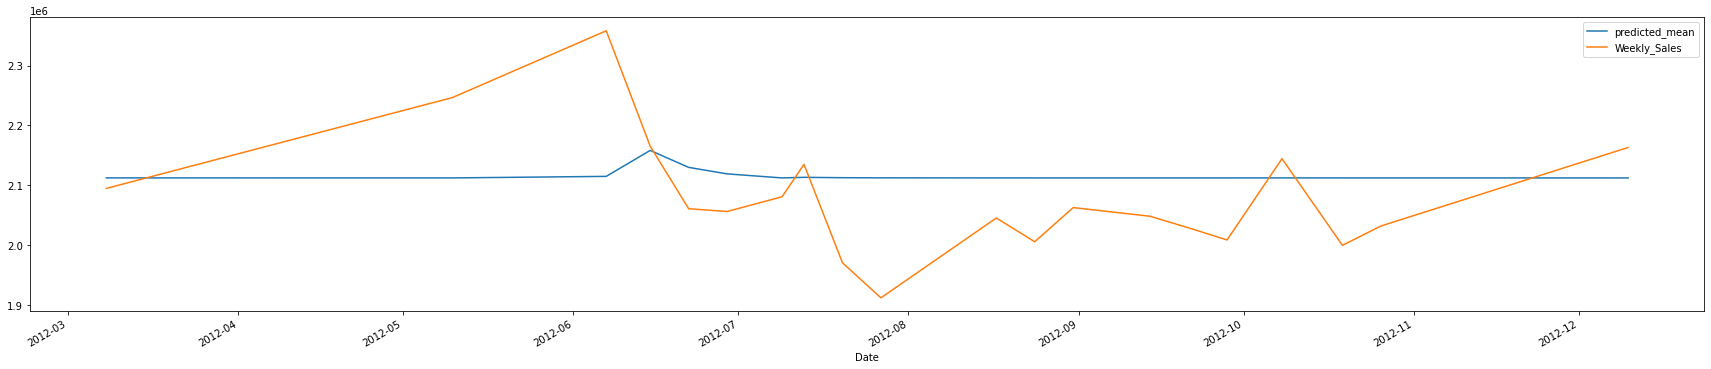

In [ ]:
plt.figure(figsize=(30,6))
Predict.plot(legend = True)
test["Weekly_Sales"].plot(legend = True)

In [ ]:
model2 = ARIMA(df3["Weekly_Sales"],order = (1,0,0))
model2 = model2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1982.712
Date:                Thu, 02 Feb 2023   AIC                           3971.425
Time:                        16:01:59   BIC                           3980.313
Sample:                             0   HQIC                          3975.037
                                - 143                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.108e+06   4.53e+04     46.567      0.000    2.02e+06     2.2e+06
ar.L1          0.3805      0.038     10.018      0.000       0.306       0.455
sigma2      6.452e+10      0.356   1.81e+11      0.000    6.45e+10    6.45e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):               676.20
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                             1.98
Prob(H) (two-sided):                  0.17   Kurtosis:                        12.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.51e+25. Standard errors may be unstable.
"""

In [ ]:
df3.tail()


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2012-09-28,20,2008351,0,58.65,3.997,215.736716,7.280
2012-05-10,20,2246412,0,60.77,3.985,215.925886,7.293
2012-12-10,20,2162951,0,47.20,4.000,216.115057,7.293
2012-10-19,20,1999363,0,56.26,3.969,216.146470,7.293
2012-10-26,20,2031651,0,60.04,3.882,216.151590,7.293


In [ ]:

# 2. Forecast the sales for each store for the next 12 weeks.

In [ ]:
index_future = pd.date_range(start= "2012-10-26",end = "2013-01-18")

pred = model2.predict(start = len(df3),end = len(df3)+84,typ = "levels").rename("ARIMA-PREDICTION")

pred.index = index_future

pred

2012-10-26    2.078750e+06
2012-10-27    2.096671e+06
2012-10-28    2.103489e+06
2012-10-29    2.106084e+06
2012-10-30    2.107071e+06
                  ...     
2013-01-14    2.107677e+06
2013-01-15    2.107677e+06
2013-01-16    2.107677e+06
2013-01-17    2.107677e+06
2013-01-18    2.107677e+06
Freq: D, Name: ARIMA-PREDICTION, Length: 85, dtype: float64

<AxesSubplot:>

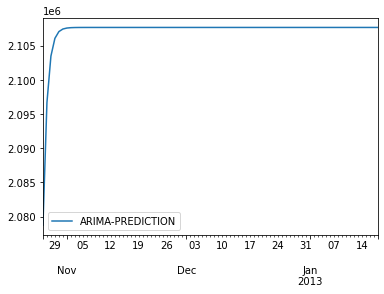

In [ ]:
pred.plot(legend = True)

In [ ]:
# so here we have predicted extra 84 days that is 12 weeks ahead with our ARIMA model and this is what the prediction looks like

# WORST PERFORMING STORE /STORE NO 33

In [ ]:
df3 = df2[df2.Store ==33]

In [ ]:
df3

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-05-02,33,274593,0,58.40,2.962,126.442065,10.115
2010-12-02,33,294883,1,55.47,2.828,126.496258,10.115
2010-02-19,33,296851,0,62.16,2.915,126.526286,10.115
2010-02-26,33,284053,0,56.50,2.825,126.552286,10.115
2010-05-03,33,291485,0,59.17,2.877,126.578286,10.115
...,...,...,...,...,...,...,...
2012-09-28,33,242814,0,86.42,3.966,131.043000,7.147
2012-05-10,33,265445,0,85.18,4.132,131.075667,6.895
2012-12-10,33,291781,0,79.64,4.468,131.108333,6.895


In [ ]:
# Now we are checking weather our data is Satationary or Non Stationary

<AxesSubplot:xlabel='Date'>

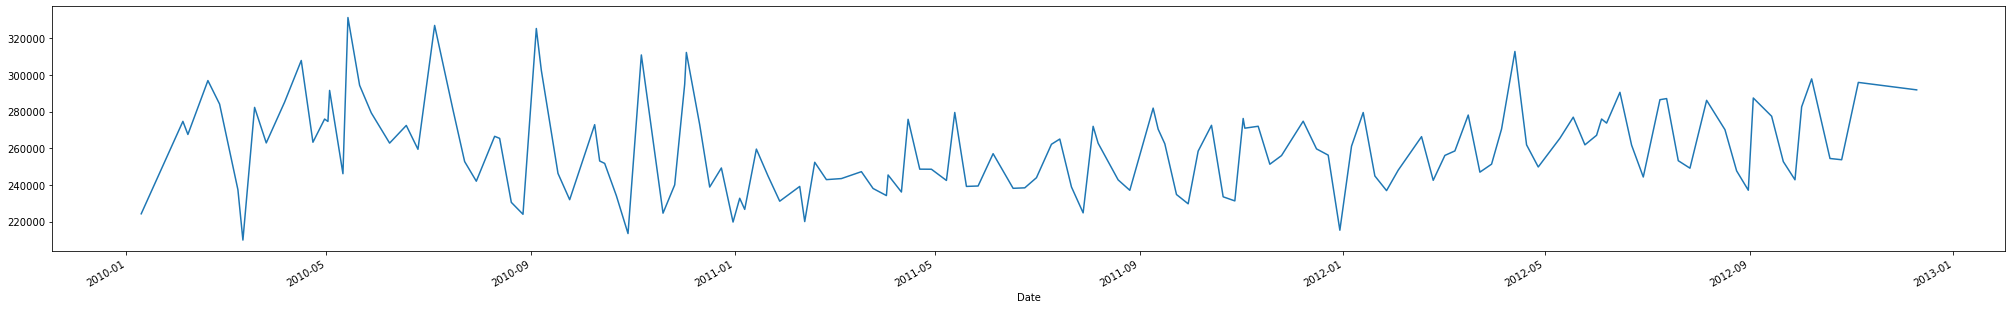

In [ ]:
plt.figure(figsize = (35,5))
df3["Weekly_Sales"].plot()

In [ ]:
# So now we by adfuller we are checking weather our model is stationary or not

In [ ]:
from statsmodels.tsa.stattools import adfuller
# if p- value > .05  - non Stationary
# if p - value< .05  - Stationary

In [ ]:
result = adfuller(df3["Weekly_Sales"])

In [ ]:
if result[1]> .05:
    print(f"Non Stationary as the value is p- value  {result[1]} > .05")
else:
    print(f"Stationary as the p-value is {result[1]}")

Stationary as the p-value is 0.0008379795761628994


In [ ]:
# so here we have proved that our data is stationary 

In [ ]:
# now we are going let autoarima decide whcih model to take 

In [ ]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [ ]:
model_selection = auto_arima(df3["Weekly_Sales"],trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.97 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3280.798, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3282.282, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3290.653, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3278.806, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3350.537, Time=0.24 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.475 seconds


In [ ]:
# so here they have told that the best fit model is ARIMA

In [ ]:
model_selection.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  143
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1638.403
Date:                Thu, 02 Feb 2023   AIC                           3278.806
Time:                        19:24:33   BIC                           3281.762
Sample:                             0   HQIC                          3280.007
                                - 143                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.114e+08   9.31e+07      6.570      0.000    4.29e+08    7.94e+08
===================================================================================
Ljung-Box (L1) (Q):                   3.21   Jarque-Bera (JB):                 4.78
Prob(Q):                              0.07   Prob(JB):                         0.09
Heteroskedasticity (H):               1.01   Skew:                             0.21
Prob(H) (two-sided):                  0.97   Kurtosis:                         2.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
df3.index

DatetimeIndex(['2010-05-02', '2010-12-02', '2010-02-19', '2010-02-26',
               '2010-05-03', '2010-12-03', '2010-03-19', '2010-03-26',
               '2010-02-04', '2010-09-04',
               ...
               '2012-08-24', '2012-08-31', '2012-07-09', '2012-09-14',
               '2012-09-21', '2012-09-28', '2012-05-10', '2012-12-10',
               '2012-10-19', '2012-10-26'],
              dtype='datetime64[ns]', name='Date', length=143, freq=None)

In [ ]:
df3.shape

(143, 7)

In [ ]:
train = df3.iloc[:-20]
test = df3.iloc[-20:]
print(train.shape,test.shape)

(123, 7) (20, 7)


In [ ]:
# implimenting the model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model = ARIMA(train["Weekly_Sales"],order = (1,1,0))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  123
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1407.535
Date:                Thu, 02 Feb 2023   AIC                           2819.069
Time:                        20:45:57   BIC                           2824.677
Sample:                             0   HQIC                          2821.347
                                - 123                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0434      0.057     -0.764      0.445      -0.155       0.068
sigma2      6.024e+08   3.24e-12   1.86e+20      0.000    6.02e+08    6.02e+08
===================================================================================
Ljung-Box (L1) (Q):                   2.38   Jarque-Bera (JB):                 4.14
Prob(Q):                              0.12   Prob(JB):                         0.13
Heteroskedasticity (H):               1.00   Skew:                             0.19
Prob(H) (two-sided):                  0.99   Kurtosis:                         2.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.79e+37. Standard errors may be unstable.
"""

In [ ]:

# now we are going to make prediction on the test set

In [ ]:
start = len(train)
end = len(train)+len(test)-1

In [ ]:
Predict = model.predict(start = start,end = end,dynamic=True)


In [ ]:
len(df3.index[start:end+1])

20

In [ ]:
len(Predict)

20

In [ ]:

Predict.index = df3.index[start:end+1]
print(Predict)

Date
2012-06-15    284999.511689
2012-06-22    285046.559898
2012-06-29    285044.516928
2012-06-07    285044.605640
2012-07-13    285044.601788
2012-07-20    285044.601955
2012-07-27    285044.601948
2012-03-08    285044.601948
2012-10-08    285044.601948
2012-08-17    285044.601948
2012-08-24    285044.601948
2012-08-31    285044.601948
2012-07-09    285044.601948
2012-09-14    285044.601948
2012-09-21    285044.601948
2012-09-28    285044.601948
2012-05-10    285044.601948
2012-12-10    285044.601948
2012-10-19    285044.601948
2012-10-26    285044.601948
Name: predicted_mean, dtype: float64


<AxesSubplot:xlabel='Date'>

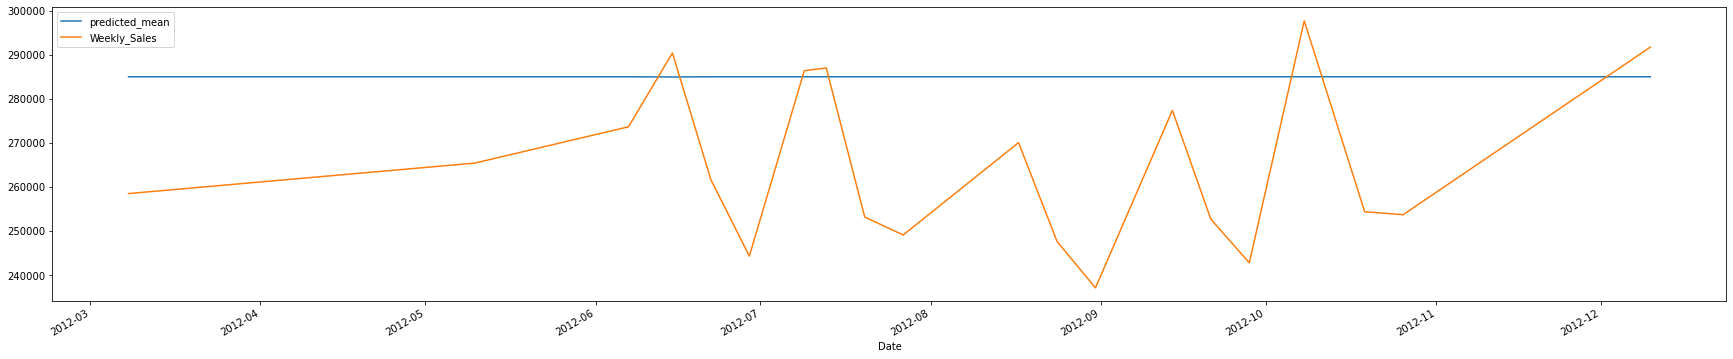

In [ ]:
plt.figure(figsize=(30,6))
Predict.plot(legend = True)
test["Weekly_Sales"].plot(legend = True)

In [ ]:
model2 = ARIMA(df3["Weekly_Sales"],order = (1,1,0))
model2 = model2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1638.134
Date:                Thu, 02 Feb 2023   AIC                           3280.268
Time:                        20:46:35   BIC                           3286.180
Sample:                             0   HQIC                          3282.671
                                - 143                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0457      0.055     -0.829      0.407      -0.154       0.062
sigma2      6.034e+08   3.54e-12    1.7e+20      0.000    6.03e+08    6.03e+08
===================================================================================
Ljung-Box (L1) (Q):                   2.31   Jarque-Bera (JB):                 5.39
Prob(Q):                              0.13   Prob(JB):                         0.07
Heteroskedasticity (H):               0.99   Skew:                             0.23
Prob(H) (two-sided):                  0.97   Kurtosis:                         2.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.56e+36. Standard errors may be unstable.
"""

In [ ]:
df3.tail()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2012-09-28,33,242814,0,86.42,3.966,131.043000,7.147
2012-05-10,33,265445,0,85.18,4.132,131.075667,6.895
2012-12-10,33,291781,0,79.64,4.468,131.108333,6.895
2012-10-19,33,254412,0,75.55,4.449,131.149968,6.895
2012-10-26,33,253731,0,73.70,4.301,131.193097,6.895


In [ ]:

# 2. Forecast the sales for each store for the next 12 weeks.

In [ ]:
index_future = pd.date_range(start= "2012-10-26",end = "2013-01-18")

pred = model2.predict(start = len(df3),end = len(df3)+84,typ = "levels").rename("ARIMA-PREDICTION")

pred.index = index_future

pred

2012-10-26    253762.136276
2012-10-27    253760.712682
2012-10-28    253760.777771
2012-10-29    253760.774795
2012-10-30    253760.774931
                  ...      
2013-01-14    253760.774925
2013-01-15    253760.774925
2013-01-16    253760.774925
2013-01-17    253760.774925
2013-01-18    253760.774925
Freq: D, Name: ARIMA-PREDICTION, Length: 85, dtype: float64

<AxesSubplot:>

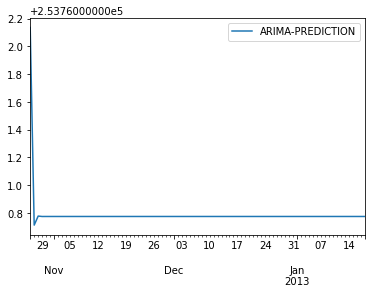

In [ ]:
pred.plot(legend = True)